<a href="https://colab.research.google.com/github/aidanvu1992/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/Anh_Vu_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
import numpy as np
import pandas as pd

In [0]:
from functools import reduce
def get_mean_var_std(n):
    #find mean
    total = reduce(lambda x, y: x + y, n)
    mean = total/len(n)
    
    #find var, std
    sum = 0
    for i in n:
      sum += (i - mean)**2
      variance = sum/(len(n))
      stddev = variance**0.5
    return f'Mean is {mean}, Variance is {variance}, Standard Dev is {stddev}'

  

In [33]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
get_mean_var_std(sales)

'Mean is 3052.714285714286, Variance is 183761.06122448976, Standard Dev is 428.67360686714756'

In [34]:
print(np.mean(sales))
print(np.var(sales))
print(np.std(sales))

3052.714285714286
183761.06122448976
428.67360686714756


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
customers = [127, 80, 105, 92, 120 ,115, 93]

In [0]:
data = {'sales': sales, 'customers': customers}
df = pd.DataFrame(data)

In [37]:
df

,sales,customers
0,3505,127
1,2400,80
2,3027,105
3,2798,92
4,3700,120
5,3250,115
6,2689,93


In [38]:
#Find covariance
table = df.cov()
table

,sales,customers
sales,214387.904762,7604.357143
customers,7604.357143,290.952381


In [39]:
covariance = table.iloc[1]['sales']
covariance

7604.357142857142

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [40]:
# STD of entered customers

get_mean_var_std(customers)

'Mean is 104.57142857142857, Variance is 249.3877551020408, Standard Dev is 15.792015549069118'

In [0]:
std_sales = np.std(sales)
std_customers = np.std(customers)

In [42]:
# Find correlation coefficient, labeled as r

r = covariance/(std_sales * std_customers)
print(r)

1.123306307450706


In [43]:
np.corrcoef(sales, customers)

array([[1.        , 0.96283398],
       [0.96283398, 1.        ]])

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv', names = None)

In [105]:
titanic.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [106]:
titanic.dtypes

Unnamed: 0            int64
pclass              float64
survived            float64
name                 object
sex                  object
age                 float64
sibsp               float64
parch               float64
ticket               object
fare                float64
cabin                object
embarked             object
boat                 object
body                float64
home.dest            object
has_cabin_number      int64
dtype: object

In [0]:
titanic = titanic[['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'body', 'has_cabin_number']]

In [108]:
titanic.head()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
0,1.0,1.0,29.0000,0.0,0.0,211.3375,NaN,1
1,1.0,1.0,0.9167,1.0,2.0,151.5500,NaN,1
2,1.0,0.0,2.0000,1.0,2.0,151.5500,NaN,1
3,1.0,0.0,30.0000,1.0,2.0,151.5500,135.0,1
4,1.0,0.0,25.0000,1.0,2.0,151.5500,NaN,1


In [109]:
titanic.isnull().sum()

pclass                 1
survived               1
age                    0
sibsp                  1
parch                  1
fare                   2
body                1189
has_cabin_number       0
dtype: int64

In [111]:
titanic = titanic.fillna(0)
titanic.isnull().sum()

pclass              0
survived            0
age                 0
sibsp               0
parch               0
fare                0
body                0
has_cabin_number    0
dtype: int64

In [115]:
titanic.describe()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
count,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000
mean,2.293130,0.381679,29.881135,0.498473,0.384733,33.244646,14.853435,0.225191
std,0.839913,0.485984,12.878277,1.041352,0.865295,51.735460,55.177911,0.417867
min,0.000000,0.000000,0.166700,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000
50%,3.000000,0.000000,29.881135,0.000000,0.000000,14.454200,0.000000,0.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,0.000000,0.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000,1.000000


In [112]:
# Variance-Covariance
titanic.cov()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.705453,-0.126482,-3.951584,0.053924,0.013952,-24.150423,-2.164033,-0.249407
survived,-0.126482,0.236181,-0.314103,-0.013932,0.034861,6.156049,-5.673581,0.061424
age,-3.951584,-0.314103,165.850021,-2.557851,-1.458263,113.462982,101.863406,1.463138
sibsp,0.053924,-0.013932,-2.557851,1.084413,0.336722,8.653922,-3.048352,-0.003858
parch,0.013952,0.034861,-1.458263,0.336722,0.748735,9.932434,-1.153653,0.013372
fare,-24.150423,6.156049,113.462982,8.653922,9.932434,2676.557808,-40.679167,10.971645
body,-2.164033,-5.673581,101.863406,-3.048352,-1.153653,-40.679167,3044.601879,0.916147
has_cabin_number,-0.249407,0.061424,1.463138,-0.003858,0.013372,10.971645,0.916147,0.174613


In [113]:
# correlation
titanic.corr()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.309865,-0.365325,0.061652,0.019197,-0.555779,-0.046694,-0.710617
survived,-0.309865,1.000000,-0.050187,-0.027529,0.082901,0.244845,-0.211578,0.302469
age,-0.365325,-0.050187,1.000000,-0.190730,-0.130862,0.170297,0.143349,0.271887
sibsp,0.061652,-0.027529,-0.190730,1.000000,0.373689,0.160630,-0.053052,-0.008865
parch,0.019197,0.082901,-0.130862,0.373689,1.000000,0.221872,-0.024163,0.036982
fare,-0.555779,0.244845,0.170297,0.160630,0.221872,1.000000,-0.014250,0.507510
body,-0.046694,-0.211578,0.143349,-0.053052,-0.024163,-0.014250,1.000000,0.039734
has_cabin_number,-0.710617,0.302469,0.271887,-0.008865,0.036982,0.507510,0.039734,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

In [0]:
import matplotlib.pyplot as plt

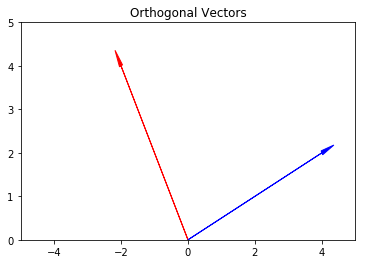

In [45]:
V1 = [-2, 4]
V2 = [4, 2]
plt.arrow(0, 0, V1[0], V1[1], head_width = 0.1, head_length = 0.4, color = 'r')
plt.arrow(0, 0, V2[0], V2[1], head_width = 0.1, head_length = 0.4, color = 'b')
plt.xlim(-5,5)
plt.ylim(0,5)
plt.title('Orthogonal Vectors')
plt.show()

# Perpendicular

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [46]:
# Two vectors are orthogonal when their dot product is equal to zero
# Check the dot product
a = np.array([-5, 3, 7])
b = np.array([6, -8, 2])
a_dot_b = np.dot(a, b)
if a_dot_b == 0:
  print('a and b are orthogonal', a_dot_b)
else:
  print('a and b are not orthogonal', a_dot_b)

a and b are not orthogonal -40


## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
c = np.array([2, -15, 6, 20])

In [0]:
norm_square = (np.linalg.norm(c))**2
self_product = np.dot(c, c)
c_transpose = c.T
c_transpose_c = np.matmul(c_transpose, c)

In [49]:
print(norm_square)
print(self_product)
print(c_transpose_c)

# All 3 quantities are equal

665.0
665
665


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}

\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} + 11\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} -8\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} = 2\hat{i} + 11\hat{j} - 8\hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [0]:
f = np.array([4, 12, 11, 9 ,2])

In [0]:
norm = np.linalg.norm(f)

In [52]:
f_hat = f/norm
f_hat

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

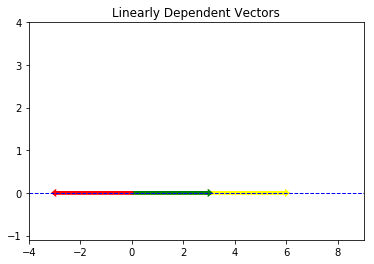

In [67]:
# linearly dependent

plt.xlim(-4,9)          
plt.ylim(-1.1,4)

A = np.array([3, 0])

A1 = np.multiply(2, A)
A2 = np.multiply(-1, A)

axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0*x_vals

plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0,0, A1[0], A1[1], linewidth=3, head_width=.05, head_length=0.05, color ='yellow')
plt.arrow(0,0, A[0], A[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0,0, A2[0], A2[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.title('Linearly Dependent Vectors')

plt.show()


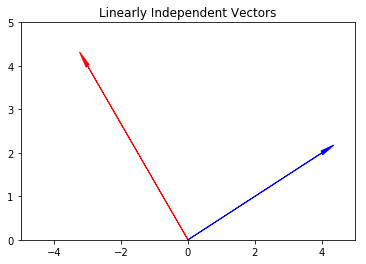

In [71]:
# linearly independent

V3 = [-3, 4]
V4 = [4, 2]
plt.arrow(0, 0, V3[0], V3[1], head_width = 0.1, head_length = 0.4, color = 'r')
plt.arrow(0, 0, V4[0], V4[1], head_width = 0.1, head_length = 0.4, color = 'b')
plt.xlim(-5,5)
plt.ylim(0,5)
plt.title('Linearly Independent Vectors')
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
g = np.array([1, 2])
h = np.array([4, 8])
span = np.matrix([g, h])

In [55]:
span

matrix([[1, 2],
        [4, 8]])

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
l = np.array([1, 2, 3])
m = np.array([-1, 0, 7])
n = np.array([4, 8, 2])
span_1 = np.matrix([l, m, n])

In [57]:
span_1

matrix([[ 1,  2,  3],
        [-1,  0,  7],
        [ 4,  8,  2]])

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



In [77]:
V5 = np.array([-2, 1])
V6 = np.array([3, 2])
span_2 = np.matrix([V5, V6])
span_2

matrix([[-2,  1],
        [ 3,  2]])

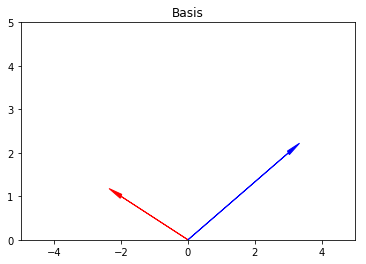

In [78]:
plt.arrow(0, 0, V5[0], V5[1], head_width = 0.1, head_length = 0.4, color = 'r')
plt.arrow(0, 0, V6[0], V6[1], head_width = 0.1, head_length = 0.4, color = 'b')
plt.xlim(-5,5)
plt.ylim(0,5)
plt.title('Basis')
plt.show()

## 6.2 What does it mean to form a basis?


The basis of a vector space V is a set of vectors that are linearly independent and that span the vector space V. A set of vectors spans a space if their linear combinations fill the space

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [0]:
P = np.matrix('1 2 3; -1 0 7; 4 8 2')

In [59]:
rank = np.linalg.matrix_rank(P)
rank

3

## 7.2 What does the rank of a matrix tell us?

The rank of a matrix is the dimension of the vector space spanned by its columns

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [0]:
v = np.array([1, 3])
w = np.array([-1, 2])

In [86]:
projection = (np.dot(w, v)/np.dot(v, v))*v
x_minus_proj = w-projection
projection

array([0.5, 1.5])

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


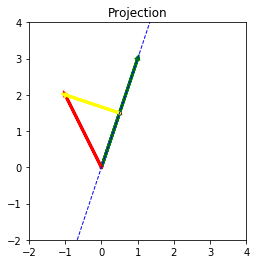

In [98]:
plt.xlim(-2,4)          
plt.ylim(-2,4)

axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 3*x_vals
plt.axes().set_aspect('equal')


plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0, 0, projection[0], projection[1], linewidth=3, head_width=.05, head_length=0.05, color ='purple')
plt.arrow(0, 0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0, 0, w[0], w[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.arrow(projection[0], projection[1], x_minus_proj[0], x_minus_proj[1], linewidth=3, head_width=.05, head_length=0.05, color = 'yellow')

plt.title("Projection")
plt.show()

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

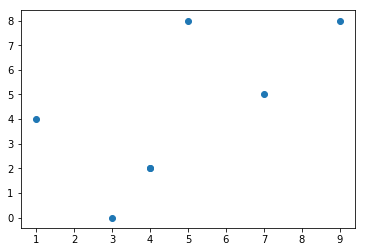

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()